# Training Deep Neural Networks

# A. The Vanishing/Exploding Gradients Problems:
* Generally, DNNs suffer from unstable gradients; different layers may learn at widely different speeds.
    * One of the few suspects is the combination of the sigmoid activation function and the weight initialization technique (normal distribution w/ mean=0, and std=1).  The variance of the outputs of each layer is much greater than the variance of its inputs. The variance keeps increasing after each layer until the activation function saturates at the top layers. When backpropagation kicks in it has virtually no gradient to propagate back through the network, and what little gradient exists keeps getting diluted as backpropagation progresses down through the top layers, so there is really nothing left for the lower layers.

* **Vanishing Gradients** Problem:
    * The backpropagation algorithm's 2nd pahse works by going from the output layer to the input layer, propagating the error gradient along the way. Once the algorithm has computed the gradient of the cost function w/ regard to each parameter in the network, it uses these gradients to update each parameter w/ a gradient descent step.
    * Unfortunately, gradients often get smaller and smaller as the algorithm progresses down to the lower layers. As a result, the gradient descent update leaves the lower layers' connection weights virtually unchanged, and trainign never converges to a good solution.

* **Exploding Gradients** Problem:
    * The gradients can grow bigger and bigger until layers get insanely large weight updates and the algorithm diverges.
    * Surfaces most often in recurrent neural networks.

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

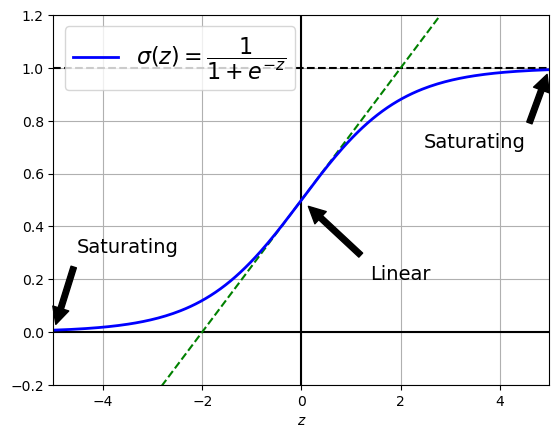

In [2]:
# Sigmoid Activation Function saturation:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z = np.linspace(-5, 5, 200)

plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [1, 1], 'k--')
plt.plot([0, 0], [-0.2, 1.2], 'k-')
plt.plot([-5, 5], [-3/4, 7/4], 'g--')
plt.plot(z, sigmoid(z), "b-", linewidth=2,
         label=r"$\sigma(z) = \dfrac{1}{1+e^{-z}}$")
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Saturating', xytext=(3.5, 0.7), xy=(5, 1), arrowprops=props,
             fontsize=14, ha="center")
plt.annotate('Saturating', xytext=(-3.5, 0.3), xy=(-5, 0), arrowprops=props,
             fontsize=14, ha="center")
plt.annotate('Linear', xytext=(2, 0.2), xy=(0, 0.5), arrowprops=props,
             fontsize=14, ha="center")
plt.grid(True)
plt.axis([-5, 5, -0.2, 1.2])
plt.xlabel("$z$")
plt.legend(loc="upper left", fontsize=16);

### A.1. Glorot and He Initialization:

* To alleviate the unstable gradients problem, the signal needs to flow properly in both directions: In the forward direction when making predictions, and in the reverse direction when backpropagating gradients.
    * The signal should not die out, nor explode and saturate. For the signal to flow properly:
        * The variance of the outputs of each layer should be equal to the variance of the inputs.
        * The gradients needs to have equal variance before and after flowing through a layer in the reverse direction.
    * It is actually not possible to guarantee both unless the layer has an equal number of inputs and outputs (*fan-in* and *fan-out* of the layer), but *Glorot* and *Bengio* proposed a good compromise:
        * The connection weights of each layer must be initialized randomly, **Glorot Initialization or Xaviar Initialization**: <br>
        &emsp; *when using the sigmoid activation function* <br>
        &emsp; Normal distribution w/ mean, $\mu$=0 and variance ,$\sigma^2=\frac{1}{fan_{avg}}$ <br>
        &emsp; Uniform distribution between $-r$ and $+r$, w/ $r\ =\ \sqrt{\frac{3}{fan_{avg}}}$ <br>
        &emsp; where $fan_{avg}\ =\ \frac{fan_{in}\ +\ fan_{out}}{2}$
        * Using Glorot Initialization can speed up training considerably.

    * **LeCun Initialization**:
        * Is equivalent to Glorot initialization when $fan_{in}\ =\ fan_{out}$

* Initialization parameters for each type of activation function: <br><br>
    &emsp; 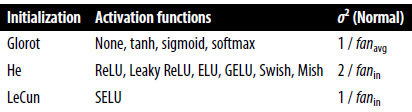

* By default, `Keras` uses Glorot initialization w/ a uniform distribution.
    * When creating a layer, you can switch to *He Initialization* by setting `kernel_initializer="he_uniform"` or `kernel_initializer="he_normal"`.
    * Alternatively, other initialization techniques can be obtained using the `VarianceScaling` initializer.

In [3]:
dense = tf.keras.layers.Dense(
    50,
    activation="relu",
    kernel_initializer="he_normal"
)

In [5]:
# Using the VarianceScaling class : Creating He Initialization w/ uniform distribution and based on fan_avg
he_avg_init = tf.keras.initializers.VarianceScaling(
    scale=2,
    mode="fan_avg", 
    distribution="uniform"
)

dense = tf.keras.layers.Dense(
    50,
    activation="sigmoid",
    kernel_initializer=he_avg_init
)